# 進階測驗

時間: 11:10-12:00；11:00-11:10為題目解講時間。如果在解講時間仍要做答而沒有聽清楚題目要做什麼，請自行負責。

方式: 一定要到教室進行小考，且有安排座位。請確定你的位置與你的學號相符。

不能與同學交談，不能傳訊息給同學，不能在寢室考試。它就是一次實體考試。只是線上的考試卷很方便，不用發下去。也幫你們做好了答題的位置。而且提前了10分鐘給說明。如果有問題就舉手問助教，問老師。但ChatGPT的答案不一定對，老師的題目也不見得是完備的。(因為如果題目很完整，說明的非常詳細，那麼直接給ChatGPT就有答案了，大家就複製貼上加註解就好了。老師也希望大家練習把不完備的說法給補齊。)

說明: 首先這個檔案是僅供檢視的，所以你必須在自己的雲端硬碟中另存副本，再開始進行你自己的回答。回答過程中可以使用ChatGPT, 最後需要附上ChatGPT的使用連結。(在ChatGPT右上角的Share Chat，把連結複製下來貼在最下面。為什麼要最下面呢？因為這個Share Chat必須是在你完成了所有問題的詢問之後再給出來，才會有完整的問答)

每一題有不同的分數，而每一題當中，程式碼都要有註解。請以文字框，把你的想法寫出來。評分將包含程式能否正確完成，有無註解，以及該回答的文字框中答案的完整性。

最後請將這個檔案下載成『你的學號_Quiz5.ipynb』檔案，並上傳到moodle繳交完成測驗。

以下這個文字框是要填寫的：

** 學號: AN4126521**

** 姓名: 江婕瀅**

** 系級: 不分 116**

# 第一題，關於複利

課堂上已有說明的複利年利率$r$與本金$A$的關係式，以及每天複利後四捨五入對最後利息的影響。請尋找一下，如果$r=0.03$，請計算考慮不同的$A$, 其每天複利後四捨五入的本利和比一年直接複利一次的本利和多(或少)多少？少的話請以負號表示。用圖形或區間告訴我什麼時候每天複利後四捨五入會比較多？什麼時候比較少？



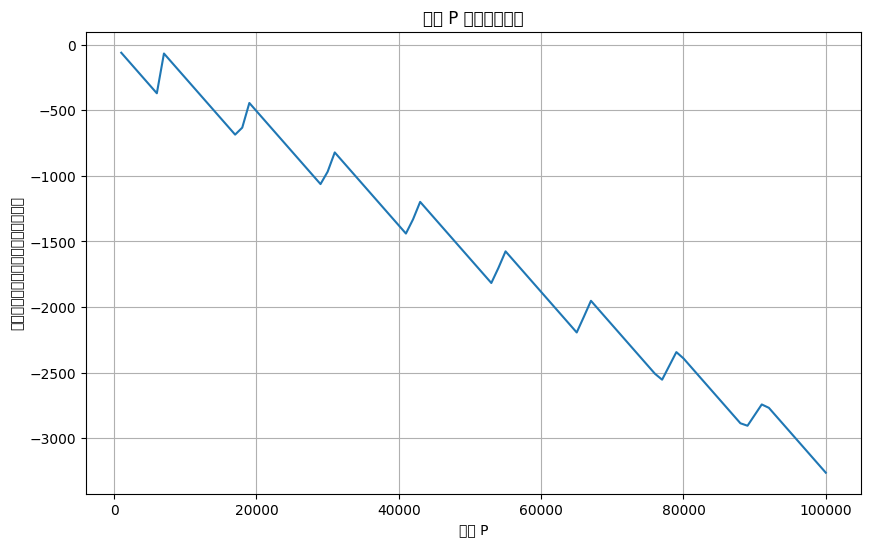

In [6]:
import matplotlib.pyplot as plt


# 輸入資訊
P = 1000  # 假設本金為1000元
r = 0.03  # 年利率為3%
n = 365   # 每天複利一次
t = 1     # 1年

# 計算每個本金 P 對應的差異
P_values = list(range(1000, 100001, 1000))
differences = []

for P in P_values:
    A_with_rounding = P
    A = P * (1 + r/n)**(n*t)
    for _ in range(n*t):
        daily_interest = A_with_rounding * (r/n)
        A_with_rounding += daily_interest
        A_with_rounding = round(A_with_rounding)

        daily_interest_without_rounding = A * (r/n)
        A += daily_interest_without_rounding

    difference = A_with_rounding - A
    differences.append(difference)

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.plot(P_values, differences)
plt.xlabel("本金 P")
plt.ylabel("四捨五入和一年直接複利一次的差異")
plt.title("本金 P 對差異的影響")
plt.grid(True)
plt.show()

# 第二題，猜/計算有可能的單字

(A) 請用input輸入一個單字，這個單字可以出現?表示你不確定那個字是什麼。舉例來說，輸入"L?V?"，你就需要從字典中找到類似的單字，並回應"LOVE"及"LIVE"。這個題目你需要自己從網路上找到字典。請google一下 English dictionary database，應該就可以找到一些csv檔案。請把字典檔案的連結也放在下面。

(B) 請用input輸入$N$。你可以告訴我，如果有一個$N$個字，每個字都不確定的英文字，你可以問這個字中有A到Z哪一個英文字, 你覺得要猜哪一個英文字，它出現的機率最高嗎？


In [7]:
from google.colab import files
import io
import os
import csv

# Upload a csv files
uploaded = files.upload()


Saving EnWords.csv to EnWords.csv


In [19]:
# 定義函數來比對單字和輸入
def match_words(input_word, dictionary_word):
    if len(input_word) != len(dictionary_word): # 比對長度相等
        return False # 提早結束比對

    for i in range(len(input_word)):
        if input_word[i] != '?' and input_word[i] != dictionary_word[i]: # 如果不是問號，且輸入單字的字母與字典內單字的字母都不符合
            return False # 提早結束比對

    return True

# 輸入搜尋詞
search_word = input()

# 將搜尋詞轉換為小寫，以忽略大小寫差異
search_word = search_word.lower()

# 儲存符合條件的單字
matching_words = []

# 開啟CSV文件並讀取內容
with open('EnWords.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        word = row[0] # 取出字典內的英文單字，以後續處理，轉換小寫比對時，不影響原資料
        if match_words(search_word, word.lower()):
            matching_words.append(row[0])

# 印出符合條件的單字
if matching_words:
    for word in matching_words:
        print(word)
else:
    print("找不到符合條件的單字。")


L?V?
lava
lave
lcvp
levi
levo
levy
live
love


你的字典是從哪裡找到的:https://github.com/1eez/103976/blob/master/EnWords.csv

# 第三題：變異數最小？

這個題目是重視111年學測數A單選第三題。假設我們有一個$x-y$的散佈圖，圖上有20個點。(這20個點請用excel或csv自行製造，但不可以在同一條直線上)。題目說要找到一條直線，使得這20個點投影到該直線所得之一維投影數據的變異數會是最小？


**請注意，這一題要自己讓題目完備。**如果你在計算的過程當中有任何疑問，請自行加條件讓題目可以做下去。或是你google一下「111學測 數A 第三題 變異數」也會了解該題目哪裡並不完備。

In [21]:
# Upload a Excel files
uploaded = files.upload()

Saving 2022學測第三題反例.xlsx to 2022學測第三題反例.xlsx


工作表1: ['工作表1']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

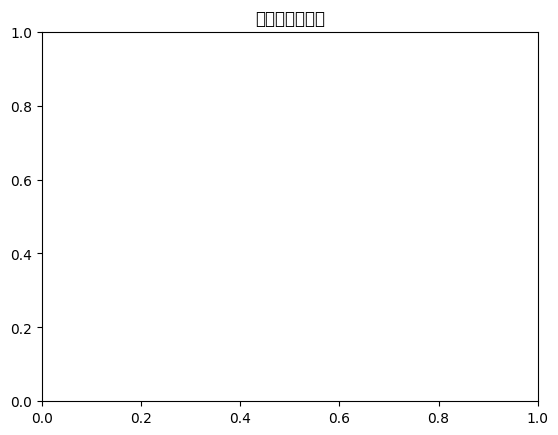

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取Excel檔案
excel_file = pd.ExcelFile('2022學測第三題反例.xlsx')

# 列出Excel檔案中的工作表名稱
sheet_names = excel_file.sheet_names
print("工作表1:", sheet_names)

# 選擇你想要的工作表
sheet_name = '工作表1'  # 請將此處的工作表名稱替換為你的實際工作表名稱

# 讀取工作表中的數據
data = excel_file.parse(sheet_name)

# 顯示圖表
plt.title('原始資料散佈圖')

plt.show()


有使用ChatGPT嗎: 有

**有**使用的話，對話連結是:https://chat.openai.com/share/4577e234-87d2-422d-b4c6-bbdb61b3b372